In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

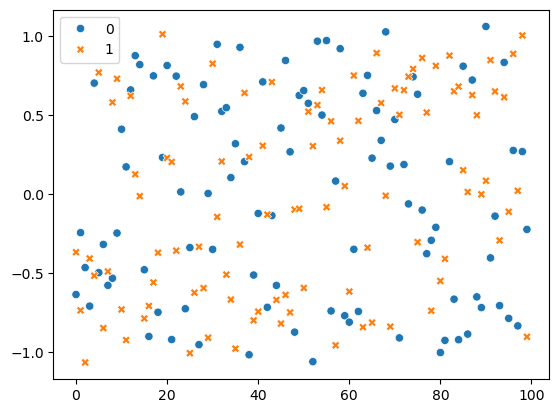

In [3]:
sns.scatterplot(X)

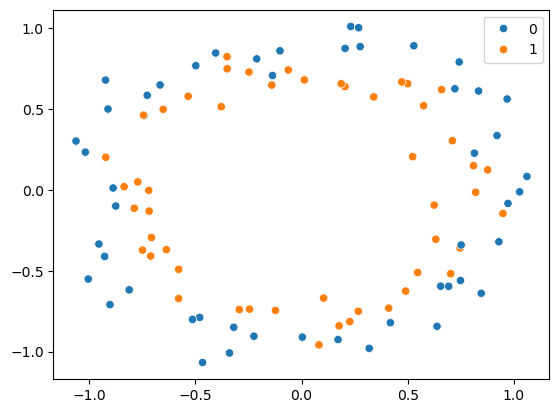

In [4]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [6]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\parvez\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=1)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.4336 - loss: 0.6978 - val_accuracy: 0.6000 - val_loss: 0.6874
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4437 - loss: 0.6961 - val_accuracy: 0.5500 - val_loss: 0.6908
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4391 - loss: 0.6963 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4305 - loss: 0.6933 - val_accuracy: 0.5500 - val_loss: 0.6953
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5203 - loss: 0.6919 - val_accuracy: 0.5500 - val_loss: 0.6964
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5125 - loss: 0.6899 - val_accuracy: 0.5500 - val_loss: 0.6975
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5086 - loss: 0.6887 - val_accuracy: 0.5000 - val_loss: 0.6990
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5492 - loss: 0.6868 - val_accuracy: 0.5000 - val_loss

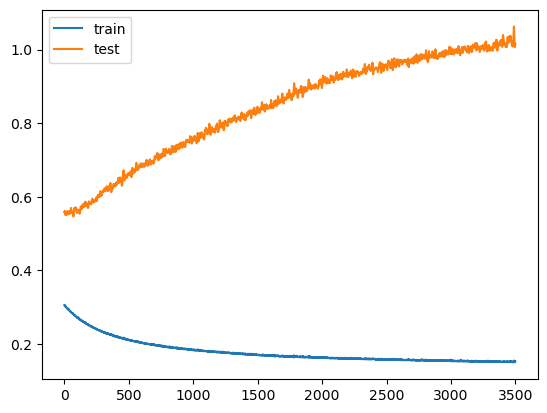

In [21]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


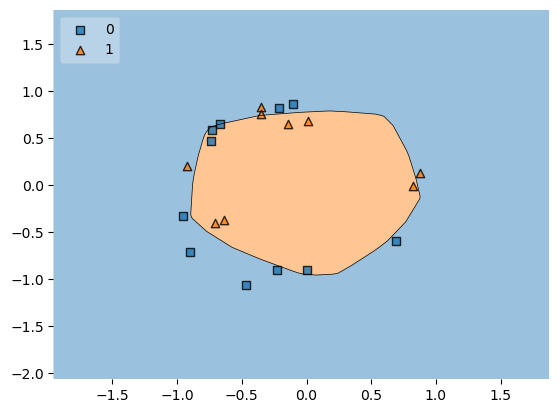

In [17]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [33]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [45]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5070 - loss: 0.6900 - val_accuracy: 0.3500 - val_loss: 0.7026
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5227 - loss: 0.6873 - val_accuracy: 0.3500 - val_loss: 0.7059
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5680 - loss: 0.6865 - val_accuracy: 0.3500 - val_loss: 0.7078
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5453 - loss: 0.6873 - val_accuracy: 0.4000 - val_loss: 0.7084
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5547 - loss: 0.6858 - val_accuracy: 0.4000 - val_loss: 0.7090
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5367 - loss: 0.6863 - val_accuracy: 0.4000 - val_loss: 0.7092
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5641 - loss: 0.6816 - val_accuracy: 0.4000 - val_loss: 0.7098
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5836 - loss: 0.6769 - val_accuracy: 0.4000 - v

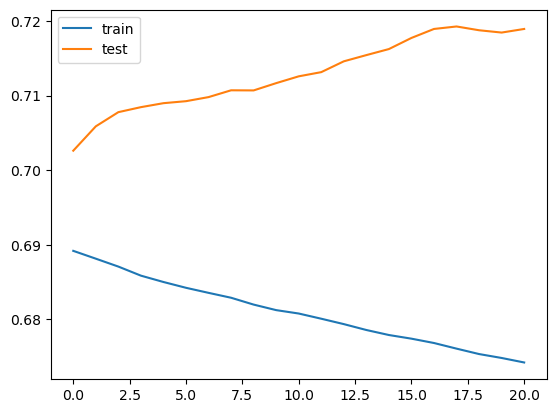

In [49]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 584us/step


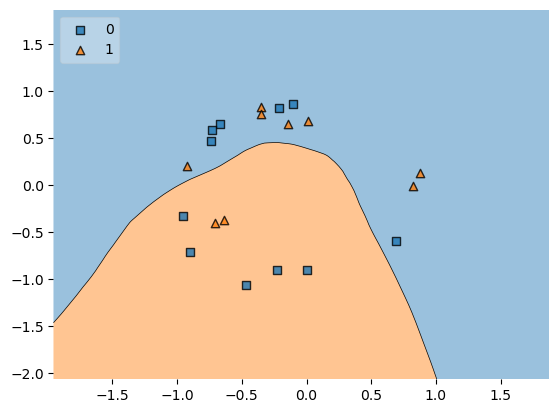

In [51]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()